In [2]:
!pip install yfinance pandas


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 995.1 kB/s eta 0:00:01
     ------------------------------- ------ 786.4/949.2 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -----------------------------------

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import yfinance as yf
import pandas as pd

In [4]:
#download historical data of tesla

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

In [5]:
#restore indixe but that date be a column

tesla_data.reset_index(inplace=True)

In [6]:
#Show firts 5 rows

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [61]:
!pip install html5lib lxml

In [57]:
import requests
from io import StringIO

In [12]:
#Url business reveneu of tesla

In [75]:
url = "https://en.wikipedia.org/wiki/Tesla,_Inc.#Financials"

In [77]:
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_data = response.text

In [78]:
html_io = StringIO(html_data)

In [79]:
tables = pd.read_html(html_io)

In [83]:

tesla_revenue = None
for t in tables:
    if any(t.columns.astype(str).str.contains("Revenue", case=False, regex=True)):
        tesla_revenue = t.copy()
        break

if tesla_revenue is None:
    raise ValueError("No se encontró ninguna tabla con 'Revenue' en Wikipedia.")


In [84]:
rev_col = [c for c in tesla_revenue.columns if "Revenue" in str(c)][0]
tesla_revenue[rev_col] = (
    tesla_revenue[rev_col].astype(str)
    .str.replace('[\$,]', '', regex=True)
)
tesla_revenue[rev_col] = pd.to_numeric(tesla_revenue[rev_col], errors="coerce")

In [85]:
tesla_revenue.tail(5)

,Year,Revenue (US$ m),Net income (US$ m),Total assets (US$ m),Employees,Sources
15,2020,31536,721,52148,70757.0,[574]
16,2021,53823,5519,62131,99290.0,[574]
17,2022,81462,12556,82338,127855.0,[574]
18,2023,96773,14997,106618,140473.0,[574]
19,2024,97690,7091,122070,125665.0,[574]


In [86]:
# 3 Question

In [87]:
#Download historical data GME
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

In [88]:
#reset index

gme_data = gme_data.reset_index()

In [89]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [90]:
#Answer 4

In [112]:
#make ticket GME

In [106]:
gme = yf.Ticker("GME")

In [113]:
#get revenew 3 month

In [107]:
gme_financials = gme.quarterly_financials


In [108]:
gme_revenue = gme_financials.T

In [114]:
if 'Total Revenue' in gme_revenue.columns:
    gme_revenue = gme_revenue[['Total Revenue']]
else:
    # Tomar la primera columna como alternativa
    gme_revenue = gme_revenue.iloc[:, [0]]

In [115]:
gme_revenue = gme_revenue.reset_index()
gme_revenue.rename(columns={'index': 'Date'}, inplace=True)

In [116]:
gme_revenue.tail(5)

,Date,Total Revenue
2,2,1.282600e+09
3,3,8.603000e+08
4,4,7.983000e+08
5,5,NaN
6,6,NaN


In [117]:
#Answer 5

In [118]:
import matplotlib.pyplot as plt

In [121]:
def make_graph(df, title="Tesla Stock Price Over Time"):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], color='green', label='TSLA Close Price')
    plt.title(title, fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

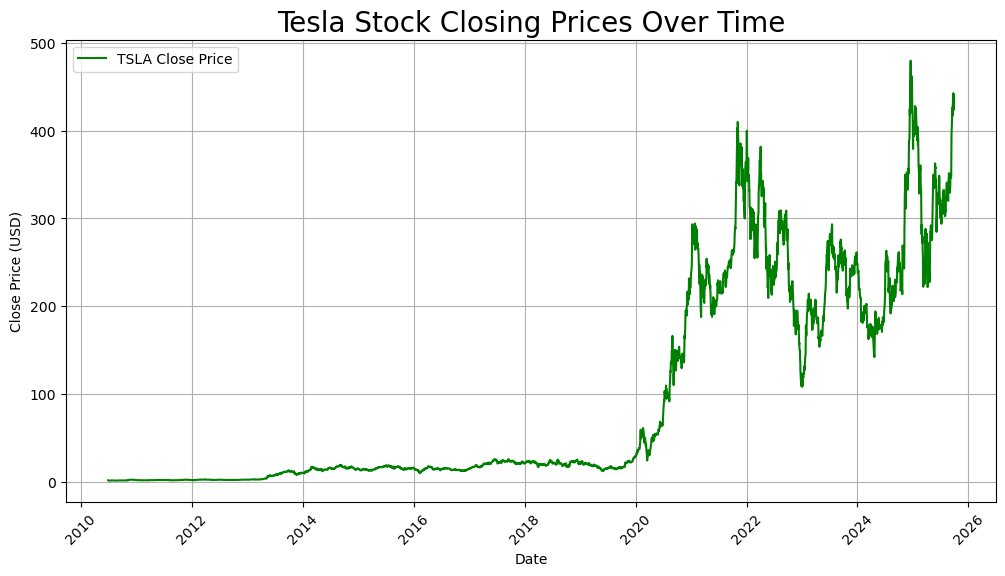

In [122]:
make_graph(tesla_data, title="Tesla Stock Closing Prices Over Time")

In [123]:
#Answer 6

In [124]:
#Get Historical data 

gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

In [125]:
#Make graph function stock price over time

In [129]:
def make_graph(stock_df, title="Stock Price Over Time"):
    plt.figure(figsize=(14,7))
    plt.plot(stock_df['Date'], stock_df['Close'], color='red', label='GME Close Price')
    plt.title(title, fontsize=25)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [127]:
# show graph

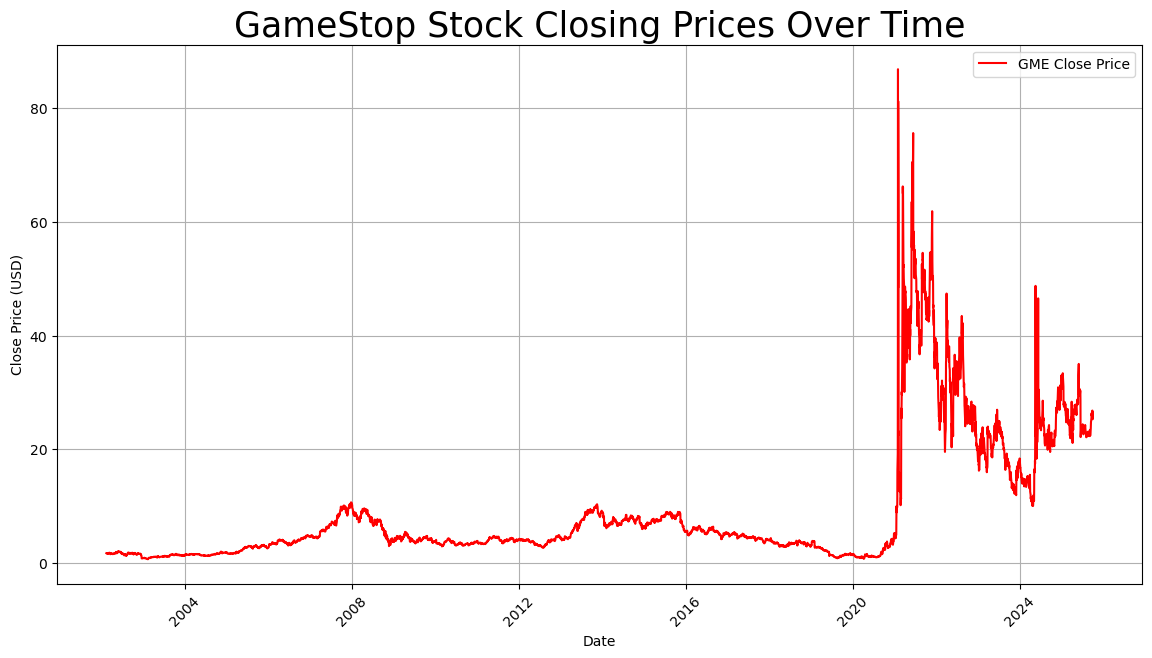

In [130]:
make_graph(gme_data, title="GameStop Stock Closing Prices Over Time")